In [1]:
%load_ext watermark
%watermark

Last updated: 2021-05-24T12:42:03.873491-05:00

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.rcParams['figure.figsize'] = (12,12)

In [3]:
datos = pd.read_excel("RESULTADOS ENCUESTAS PLAN DE VIDA.xlsx")
datos.head()

Marca temporal Dirección de residencia  \
0  2019/02/13 12:32:03 p. m. GMT-5      resguardo indigena   
1   2019/02/13 5:50:46 p. m. GMT-5      resguardo indigena   
2   2019/02/13 6:24:29 p. m. GMT-5      resguardo indigena   
3   2019/02/13 6:44:27 p. m. GMT-5      resguardo indigena   
4   2019/02/13 8:42:59 p. m. GMT-5      resguardo indigena   

  Sector de residencia            Nombres          Apellidos    Sexo  \
0             lavaderos     carlos arturo  villalobos poveda  Hombre   
1             lavaderos     luis fernando      sanchez amaya  Hombre   
2             lavaderos       luis felipe     fuentes bojaca  Hombre   
3             lavaderos    anderson david   perez villalobos  Hombre   
4             lavaderos  wilmer alexander   bojaca hernandez  Hombre   

  Fecha de nacimiento  Años cumplidos (edad)  \
0          1950-03-17                   68.0   
1          1997-09-18                   21.0   
2          2001-04-14                   17.0   
3          1994-06-27                   24.0   
4          1994-02-22                   24.0   

  Lugar de nacimiento (Departamento) Lugar de nacimiento (Municipio)  ...  \
0                       cundinamarca                            chia  ...   
1                             bogota                          bogota  ...   
2                             bogota                          bogota  ...   
3                             bogota                          bogota  ...   
4                             bogota                          bogota  ...   

  Ordene dependiendo el grado de importancia que usted considere de los siguientes ítems (siendo 1 el más importante y 7 el menos importante): [Cultura y espiritualidad]  \
0                                                5.0                                                                                                                        
1                                                5.0                                                                                                                        
2                                                4.0                                                                                                                        
3                                                2.0                                                                                                                        
4                                                4.0                                                                                                                        

   Ordene dependiendo el grado de importancia que usted considere de los siguientes ítems (siendo 1 el más importante y 7 el menos importante): [Salud]  \
0                                                2.0                                                                                                      
1                                                7.0                                                                                                      
2                                                5.0                                                                                                      
3                                                7.0                                                                                                      
4                                                3.0                                                                                                      

  Ordene dependiendo el grado de importancia que usted considere de los siguientes ítems (siendo 1 el más importante y 7 el menos importante): [Economía]  \
0                                                6.0                                                                                                        
1                                                3.0                                                                                                        
2                    

In [4]:
datos = datos.drop(['Marca temporal'], axis=1)

In [5]:
datos.head()

Dirección de residencia Sector de residencia            Nombres  \
0      resguardo indigena             lavaderos     carlos arturo   
1      resguardo indigena             lavaderos     luis fernando   
2      resguardo indigena             lavaderos       luis felipe   
3      resguardo indigena             lavaderos    anderson david   
4      resguardo indigena             lavaderos  wilmer alexander   

           Apellidos    Sexo Fecha de nacimiento  Años cumplidos (edad)  \
0  villalobos poveda  Hombre          1950-03-17                   68.0   
1      sanchez amaya  Hombre          1997-09-18                   21.0   
2     fuentes bojaca  Hombre          2001-04-14                   17.0   
3   perez villalobos  Hombre          1994-06-27                   24.0   
4   bojaca hernandez  Hombre          1994-02-22                   24.0   

  Lugar de nacimiento (Departamento) Lugar de nacimiento (Municipio)  \
0                       cundinamarca                            chia   
1                             bogota                          bogota   
2                             bogota                          bogota   
3                             bogota                          bogota   
4                             bogota                          bogota   

  Tipo de documento de identidad  ...  \
0           Cédula de ciudadanía  ...   
1           Cédula de ciudadanía  ...   
2           Tarjeta de identidad  ...   
3           Cédula de ciudadanía  ...   
4           Cédula de ciudadanía  ...   

   Ordene dependiendo el grado de importancia que usted considere de los siguientes ítems (siendo 1 el más importante y 7 el menos importante): [Cultura y espiritualidad]  \
0                                                5.0                                                                                                                         
1                                                5.0                                                                                                                         
2                                                4.0                                                                                                                         
3                                                2.0                                                                                                                         
4                                                4.0                                                                                                                         

  Ordene dependiendo el grado de importancia que usted considere de los siguientes ítems (siendo 1 el más importante y 7 el menos importante): [Salud]  \
0                                                2.0                                                                                                     
1                                                7.0                                                                                                     
2                                                5.0                                                                                                     
3                                                7.0                                                                                                     
4                                                3.0                                                                                                     

  Ordene dependiendo el grado de importancia que usted considere de los siguientes ítems (siendo 1 el más importante y 7 el menos importante): [Economía]  \
0                                                6.0                                                                                                        
1                                                3.0                                                                                                        
2              

# Datos Duplicados

Miramos que datos son identicos dentro del dataset para descartarlos

In [6]:
datos[datos.duplicated()].shape

(1, 117)

In [7]:
datos = datos.drop_duplicates()

In [8]:
datos[datos.duplicated()].shape

(0, 117)

In [9]:
datos.shape

(171, 117)

<IPython.core.display.Javascript object>


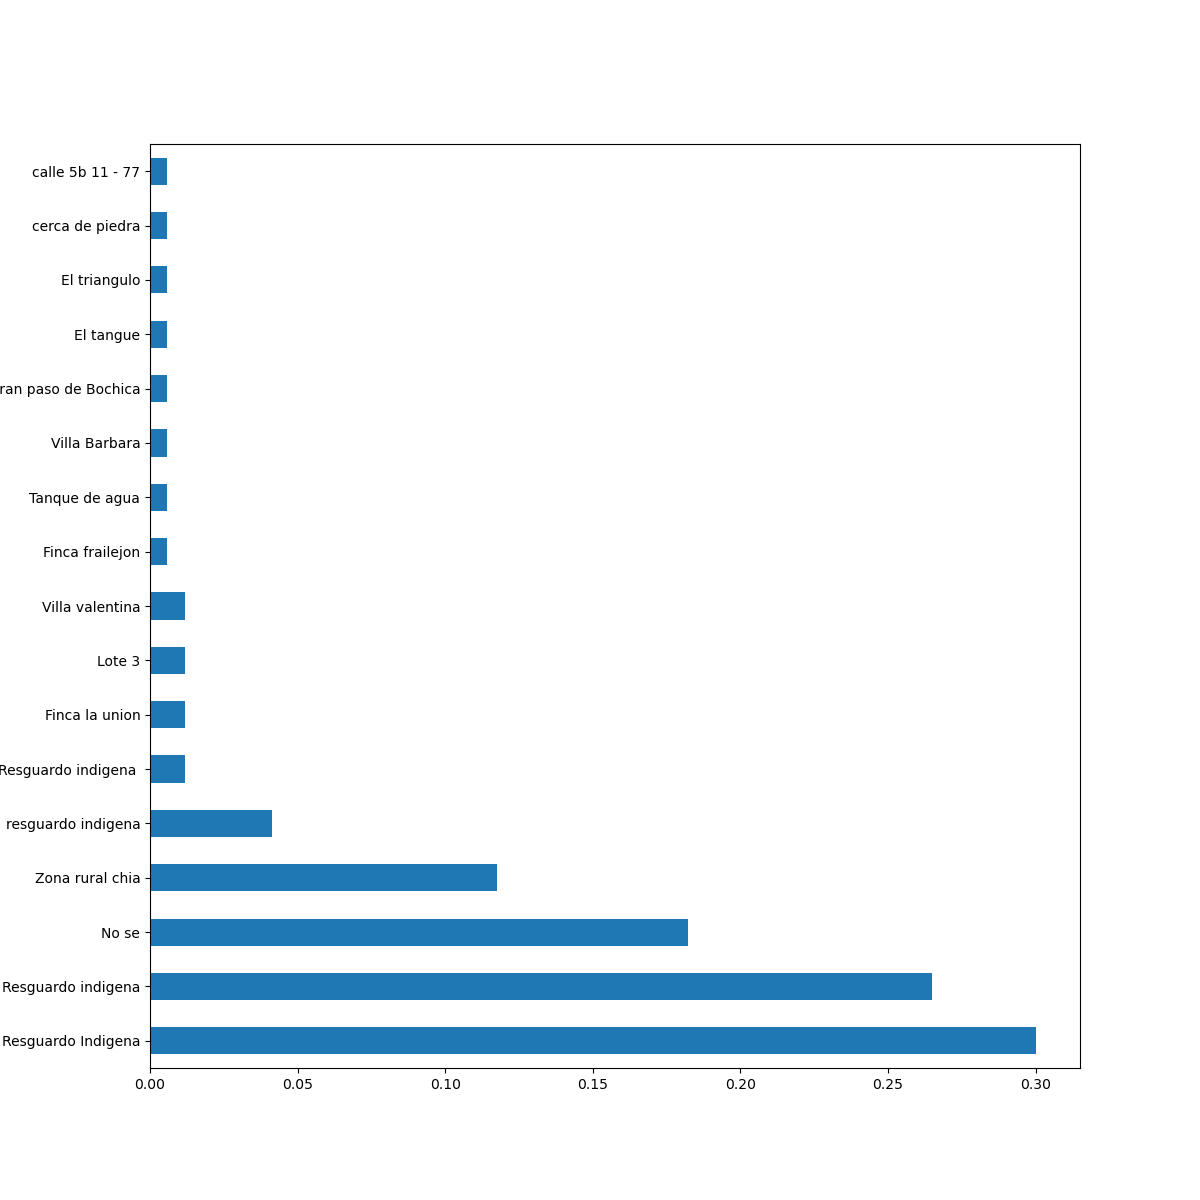

In [10]:
datos['Dirección de residencia'].value_counts(normalize=True).plot.barh()

<IPython.core.display.Javascript object>


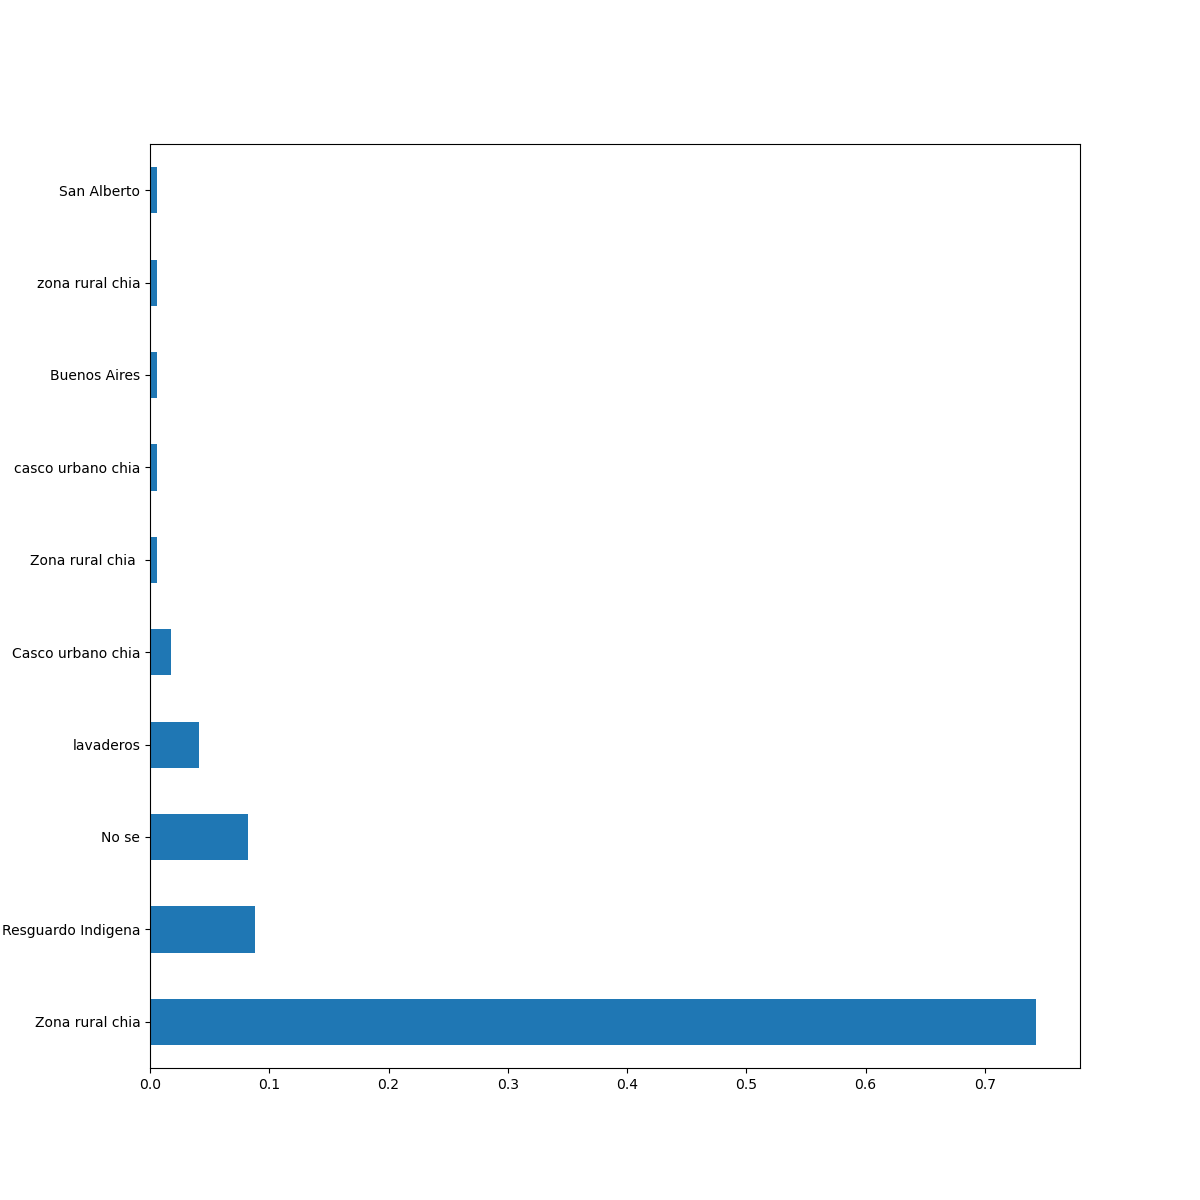

In [11]:
datos['Sector de residencia '].value_counts(normalize=True).plot.barh()

En estas y otras columnas hay records que por su escritura son reconocidos de forma distinta, sin embargo es evidente que hacen referencia al mismo valor. 

# Valores Inexistentes

¿qué columnas tienen muchos valores nulos?

In [12]:
for columna in datos:
    nulos = len(datos[datos[columna].isnull()])
    records = len(datos[columna])
    print("{} | {}".format(datos[columna].name, nulos/records))

Dirección de residencia | 0.005847953216374269
Sector de residencia  | 0.0
Nombres | 0.0
Apellidos | 0.0
Sexo | 0.0
Fecha de nacimiento | 0.029239766081871343
Años cumplidos (edad) | 0.04678362573099415
Lugar de nacimiento (Departamento) | 0.0
Lugar de nacimiento (Municipio) | 0.0
Tipo de documento de identidad | 0.005847953216374269
Número de documento de identidad | 0.029239766081871343
Código núcleo familiar  | 0.0
¿Se auto reconoce como indígena? | 0.011695906432748537
¿Por qué (en una frase)? | 0.023391812865497075
¿Sabe cuál es la ley de origen de los Mhuysqas? | 0.03508771929824561
¿Sabe que es cosmovisión? | 0.029239766081871343
¿Conoce su árbol genealógico? | 0.017543859649122806
¿Sabe qué es un Plan de Vida? | 0.017543859649122806
¿Está usted de acuerdo con la construcción del Plan de Vida? | 0.029239766081871343
¿Sabe quién construye el Plan de vida para la comunidad indígena Mhuysqa de Fonquetá y Cerca de Piedra? | 0.017543859649122806
¿Cuántos sectores tiene el resguardo? 

Hay muchas columnas con valores nulos, varias superan el 50% de valores inexistentes.

In [13]:
for columna in datos:
    print(datos[columna].name)

Dirección de residencia
Sector de residencia 
Nombres
Apellidos
Sexo
Fecha de nacimiento
Años cumplidos (edad)
Lugar de nacimiento (Departamento)
Lugar de nacimiento (Municipio)
Tipo de documento de identidad
Número de documento de identidad
Código núcleo familiar 
¿Se auto reconoce como indígena?
¿Por qué (en una frase)?
¿Sabe cuál es la ley de origen de los Mhuysqas?
¿Sabe que es cosmovisión?
¿Conoce su árbol genealógico?
¿Sabe qué es un Plan de Vida?
¿Está usted de acuerdo con la construcción del Plan de Vida?
¿Sabe quién construye el Plan de vida para la comunidad indígena Mhuysqa de Fonquetá y Cerca de Piedra?
¿Cuántos sectores tiene el resguardo?
¿Cómo se llaman los sectores del resguardo?
¿Con qué veredas y municipios colinda el resguardo?
¿El resguardo Indígena de Fonquetá y Cerca de Piedra tiene nacimientos de agua?
¿Identifica especies nativas de plantas y animales dentro del territorio?
¿Conoce los lugares sagrados del territorio del resguardo indígena?
¿El resguardo cuenta 

### Nota

Además hay columnas que están comprendidas en otras, por ejemplo si miramos la identidades como: 
* Practica de actividades agricolas y cuales actividades.
* Preparacion de comidas tradicionales y cuales comidas.
* Leyes que regulan y protegen a las comunidades y cuales leyes.

Estas entidades y algunas otras dentro del dataset generan redundancia en la información, por tanto es posible despreciar algunas columnas sin generar perdida.

## Nombres de las columnas

Se debe renombrar las columnas haciendo enfasis en palabras clave y no en la pregunta en si misma. (resumen de cada columna en una o dos palabras).
* Sin ortografia (omitir comas, puntos, tildes, etc)